<a href="https://colab.research.google.com/github/shamshisham/Customer_Churn_ML/blob/main/Telco_churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
telco_data = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [180]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [181]:
telco_data.shape

(7043, 21)

In [183]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [184]:
telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [185]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Target Variable count')

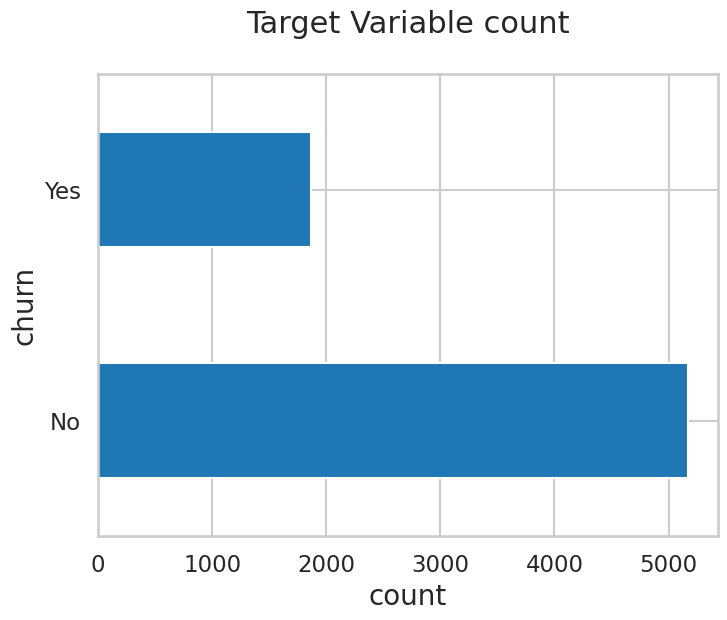

In [187]:
telco_data['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('count')
plt.ylabel('churn')
plt.title('Target Variable count')

In [188]:
telco_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [115]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


In [189]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Cleaning

In [202]:
#create an independent copy form data manupilation and cleaning
telco_data_copy=telco_data.copy()

In [13]:
telco_data_copy['TotalCharges']=pd.to_numeric(telco_data_copy['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [203]:
telco_data_copy['TotalCharges']=pd.to_numeric(telco_data_copy['TotalCharges'],errors='coerce')

In [204]:
telco_data_copy.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [205]:
telco_data_copy[telco_data_copy['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [206]:
#drop null values
telco_data_copy.dropna(how='any',inplace =True)
telco_data_copy.shape

(7032, 21)

In [207]:
#tenure Feature Binning
labels=['{0}-{1}'.format(i,i+11)for i in range(1,72,12)]
telco_data_copy['tenure_groups']=pd.cut(telco_data_copy['tenure'],range(1,80,12),right=False,labels=labels)
telco_data_copy['tenure_groups'].value_counts()

,count
tenure_groups,
1-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


In [208]:
#remove unused features in analysis
telco_data_copy.drop(columns=['customerID','tenure'],axis=1 ,inplace=True)


In [198]:
telco_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


Data Exploration

Univariate Analysis

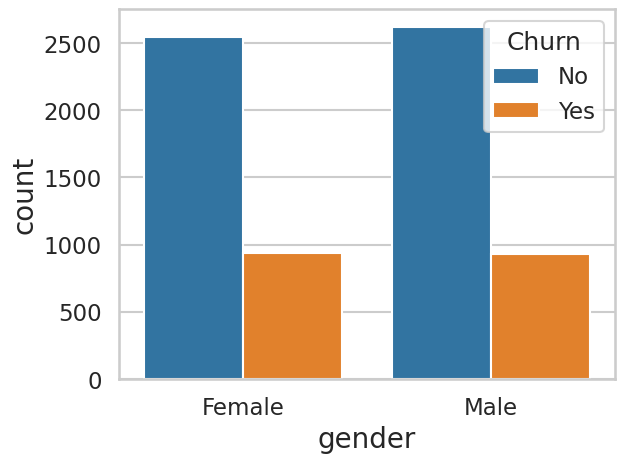

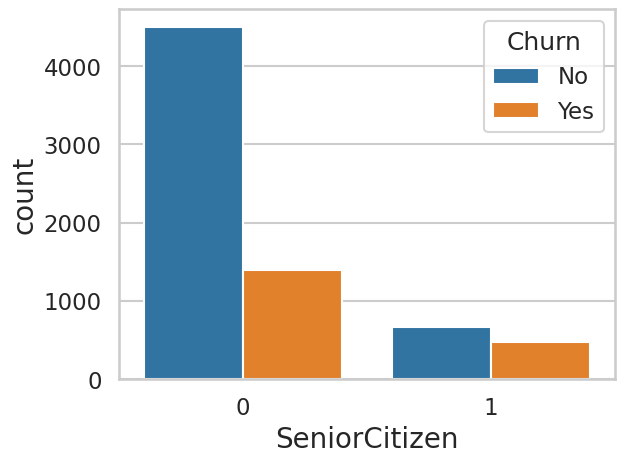

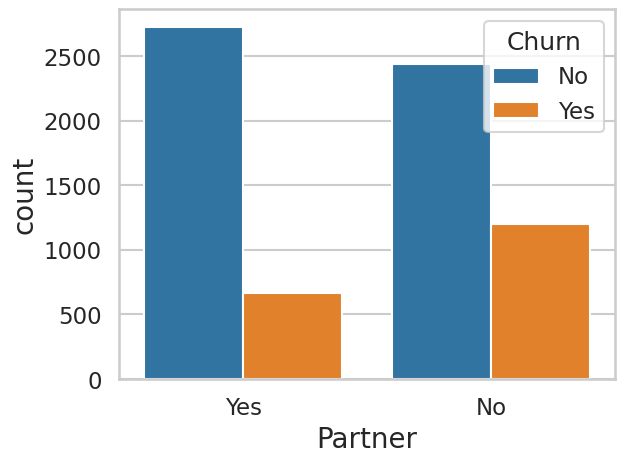

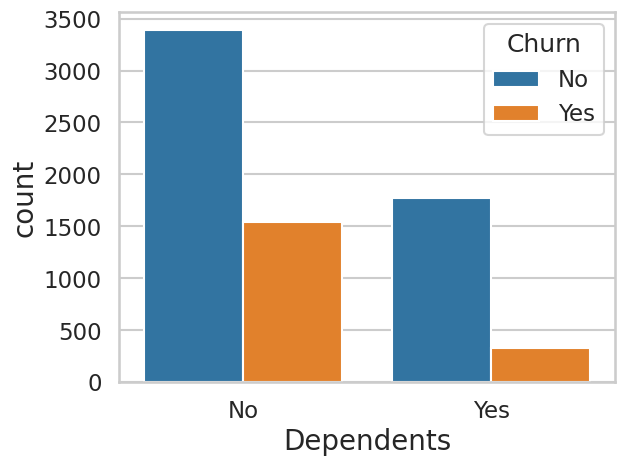

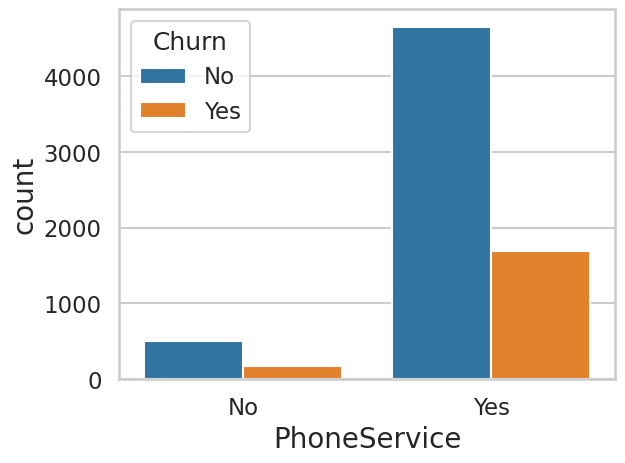

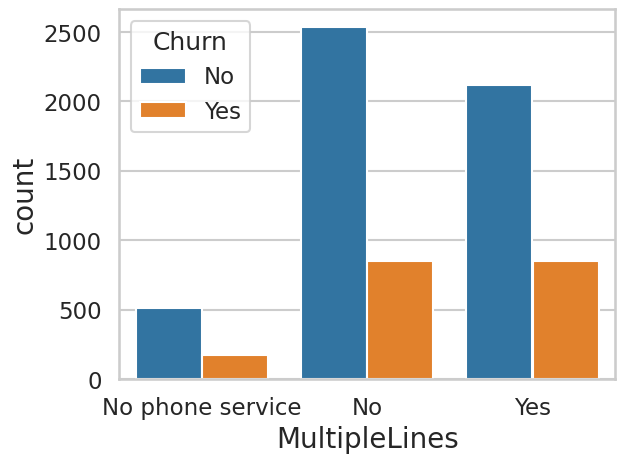

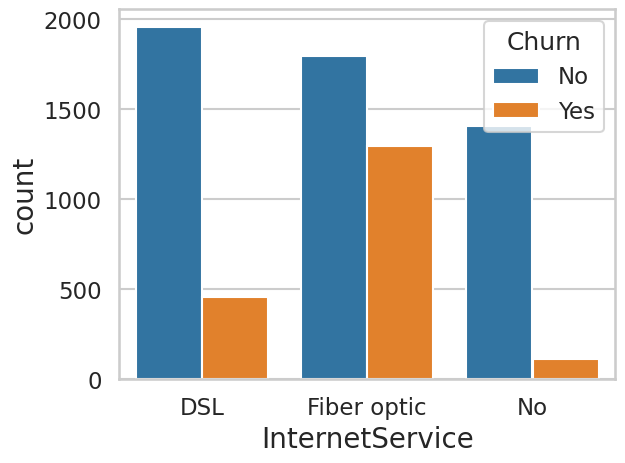

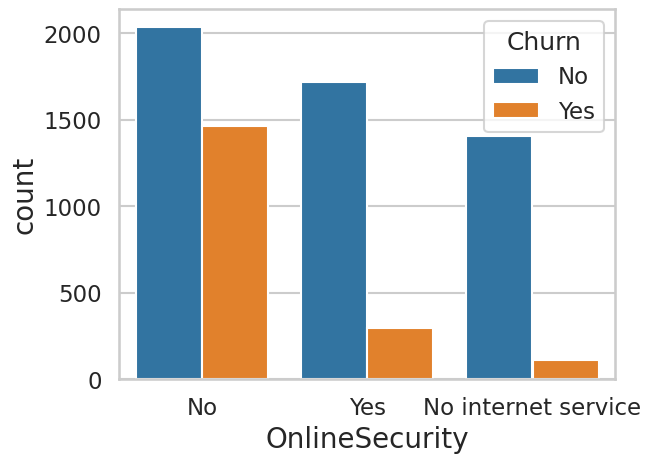

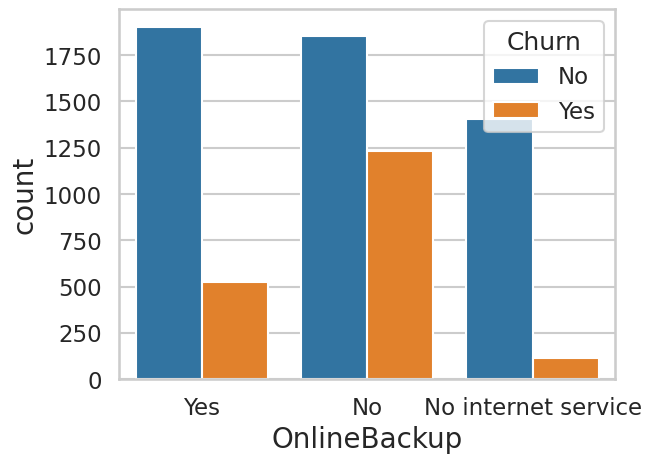

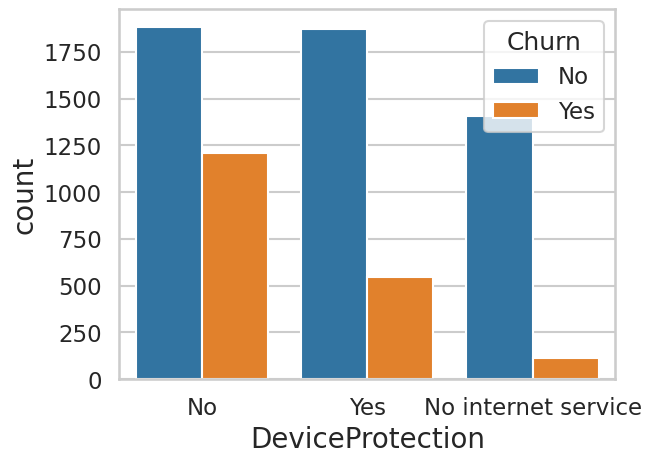

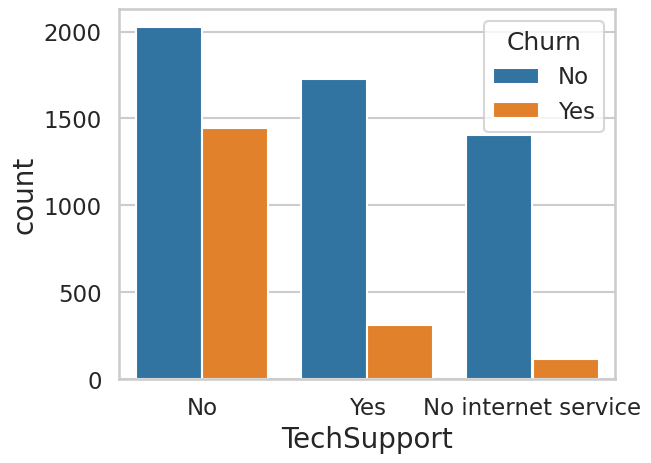

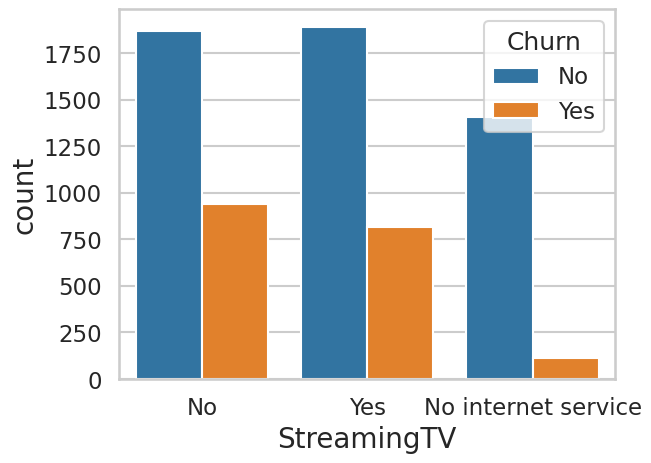

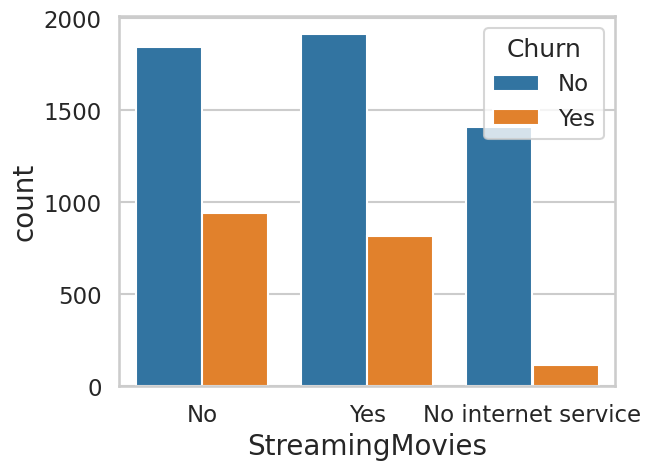

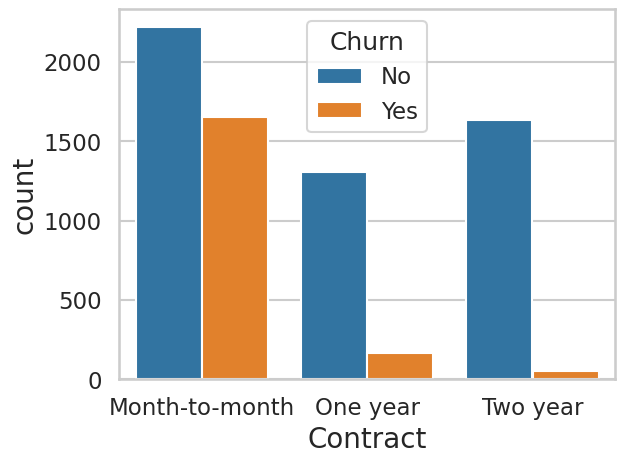

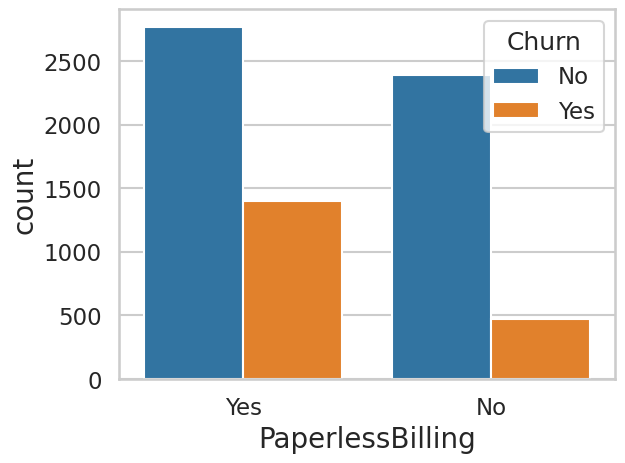

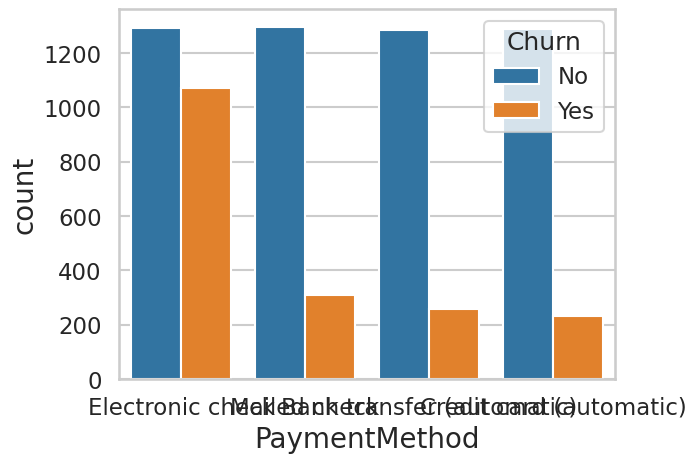

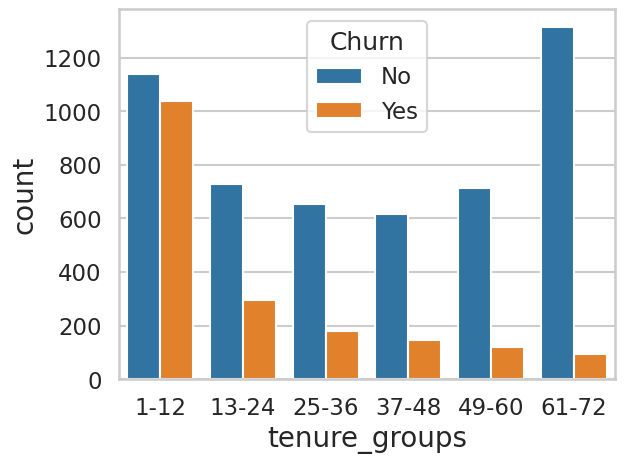

In [209]:
for i,predicator in enumerate(telco_data_copy.drop(columns=['Churn','MonthlyCharges','TotalCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data_copy,x=predicator,hue='Churn')

In [210]:
telco_data_copy['Churn'] = np.where(telco_data_copy.Churn == 'Yes',1,0)
telco_data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [211]:
# One-Hot Encoding for catogoral data
telco_data_dummies = pd.get_dummies(telco_data_copy,dtype=int)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groups_1-12,tenure_groups_13-24,tenure_groups_25-36,tenure_groups_37-48,tenure_groups_49-60,tenure_groups_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


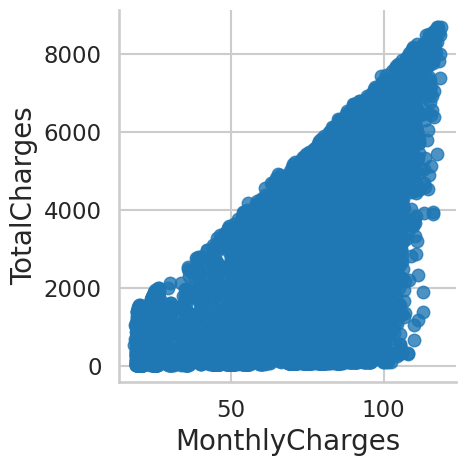

In [212]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges',fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

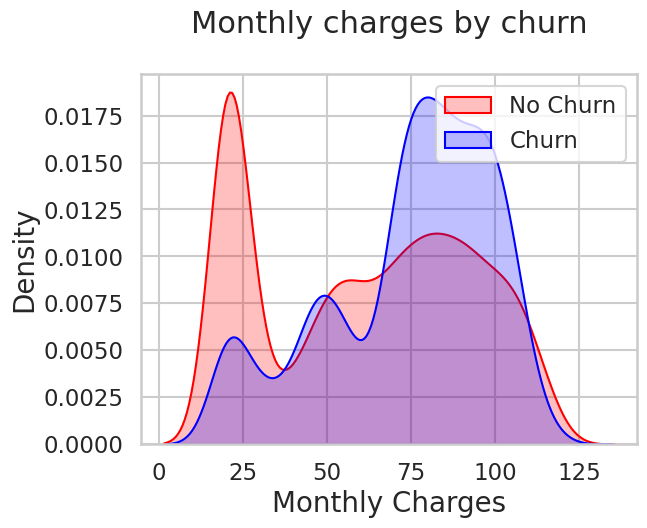

In [213]:
Month_plot = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill=True)
Month_plot = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Month_plot, color="Blue", fill=True)
Month_plot.legend(["No Churn","Churn"],loc='upper right')
Month_plot.set_ylabel('Density')
Month_plot.set_xlabel('Monthly Charges')
Month_plot.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

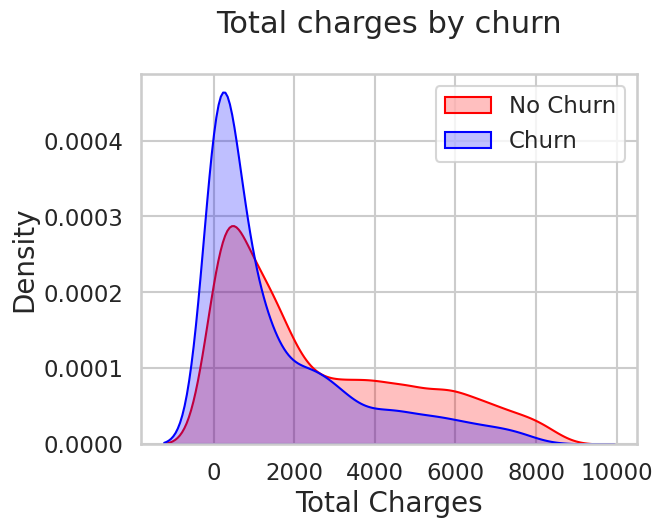

In [214]:
Total_plot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill=True)
Total_plot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Total_plot, color="Blue",fill=True)
Total_plot.legend(["No Churn","Churn"],loc='upper right')
Total_plot.set_ylabel('Density')
Total_plot.set_xlabel('Total Charges')
Total_plot.set_title('Total charges by churn')

<Axes: >

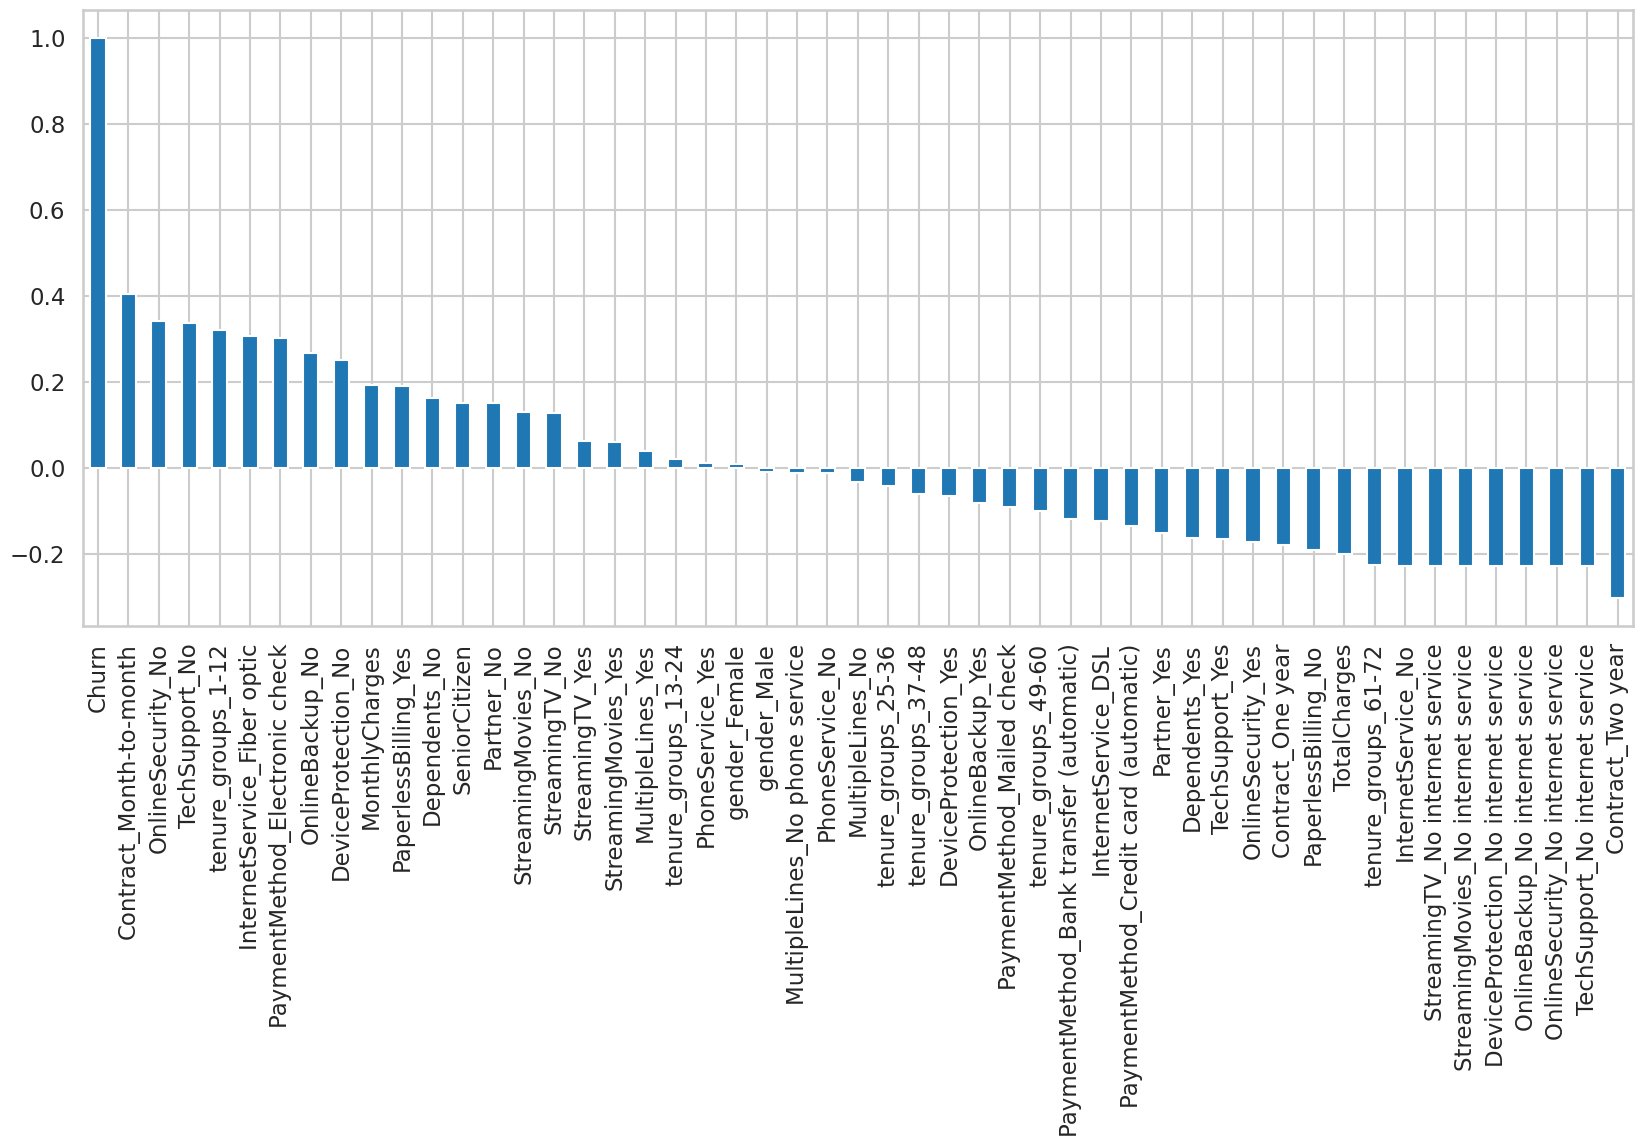

In [133]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

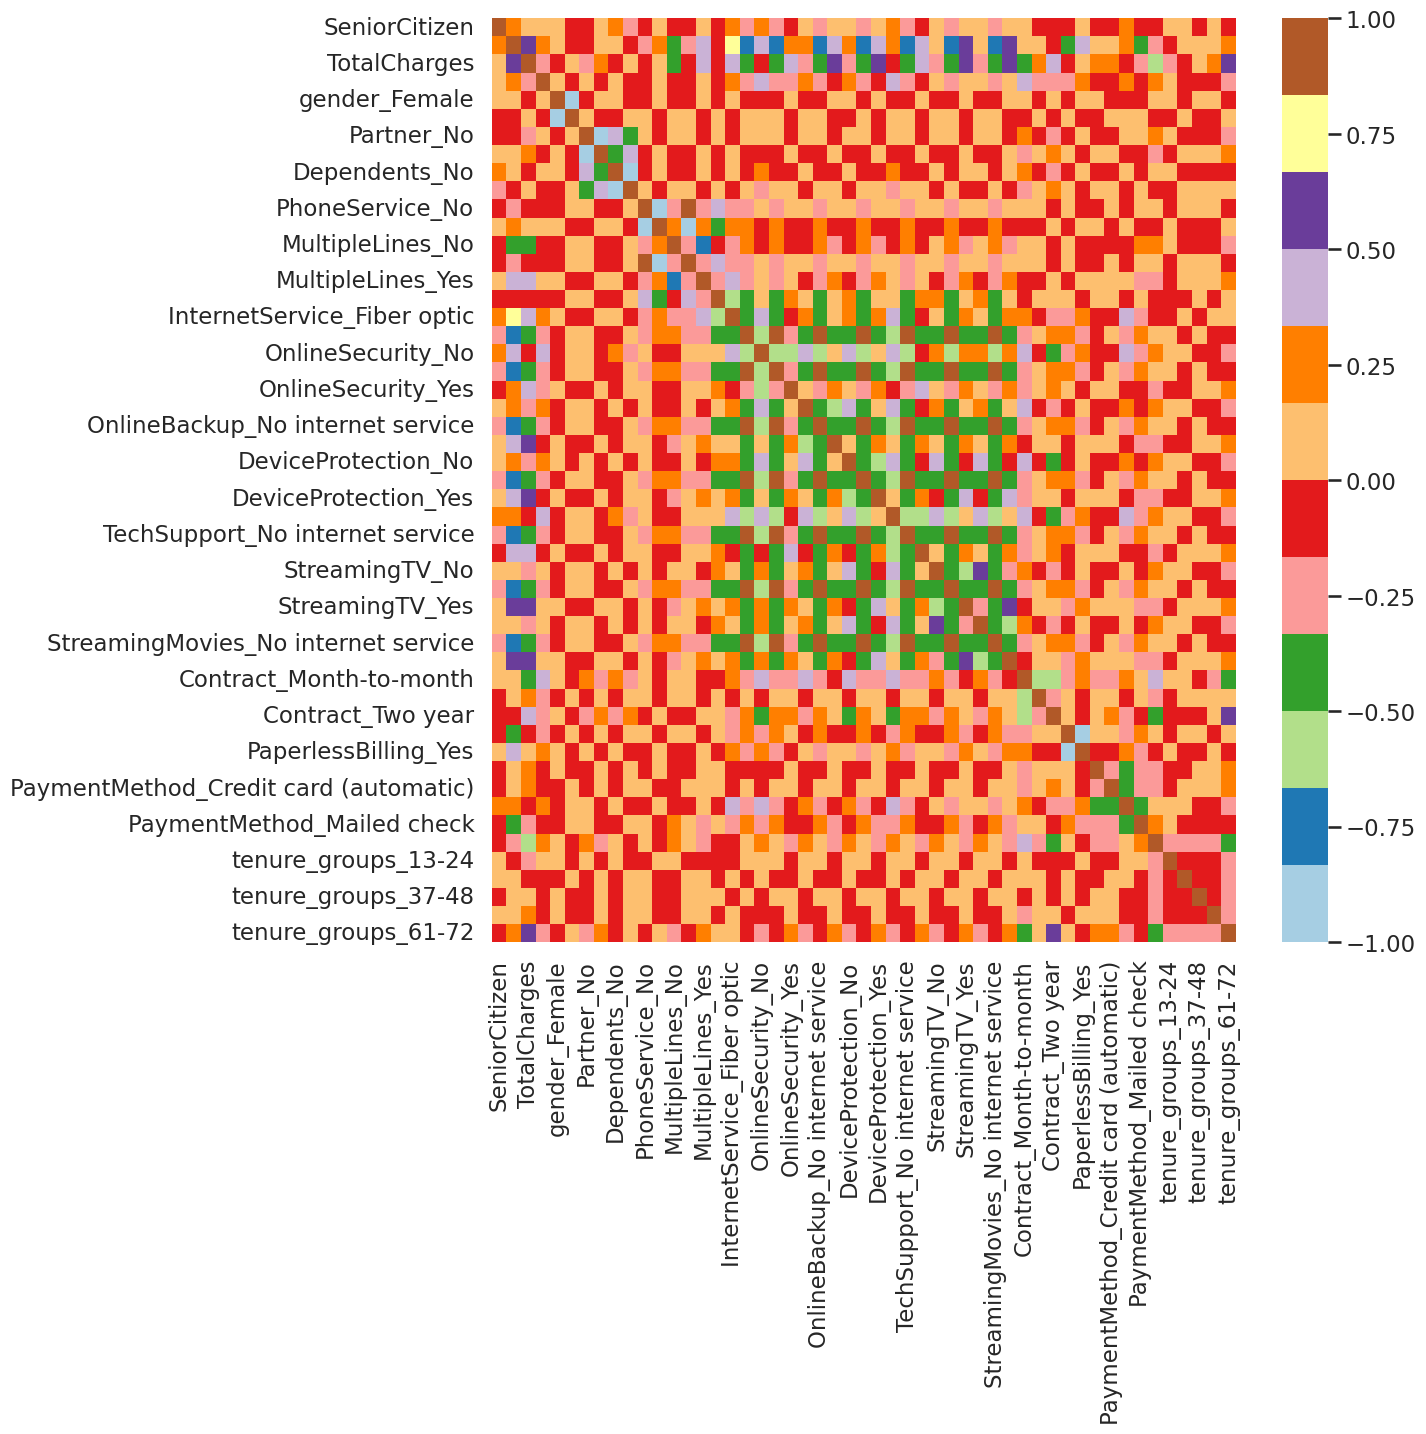

In [215]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

Bivariate Analysis

In [141]:
new_df1_target0=telco_data_copy.loc[telco_data_copy["Churn"]==0]
new_df1_target1=telco_data_copy.loc[telco_data_copy["Churn"]==1]

In [216]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    # plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

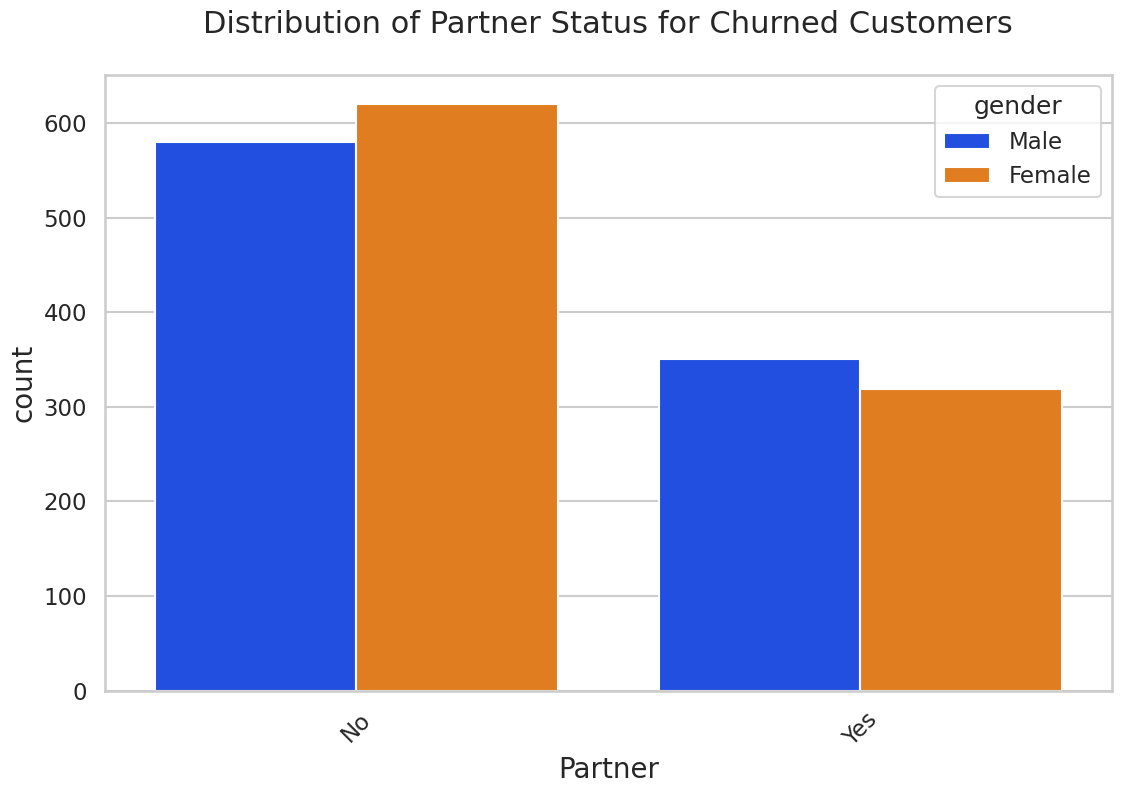

In [217]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Partner Status for Churned Customers',hue='gender')

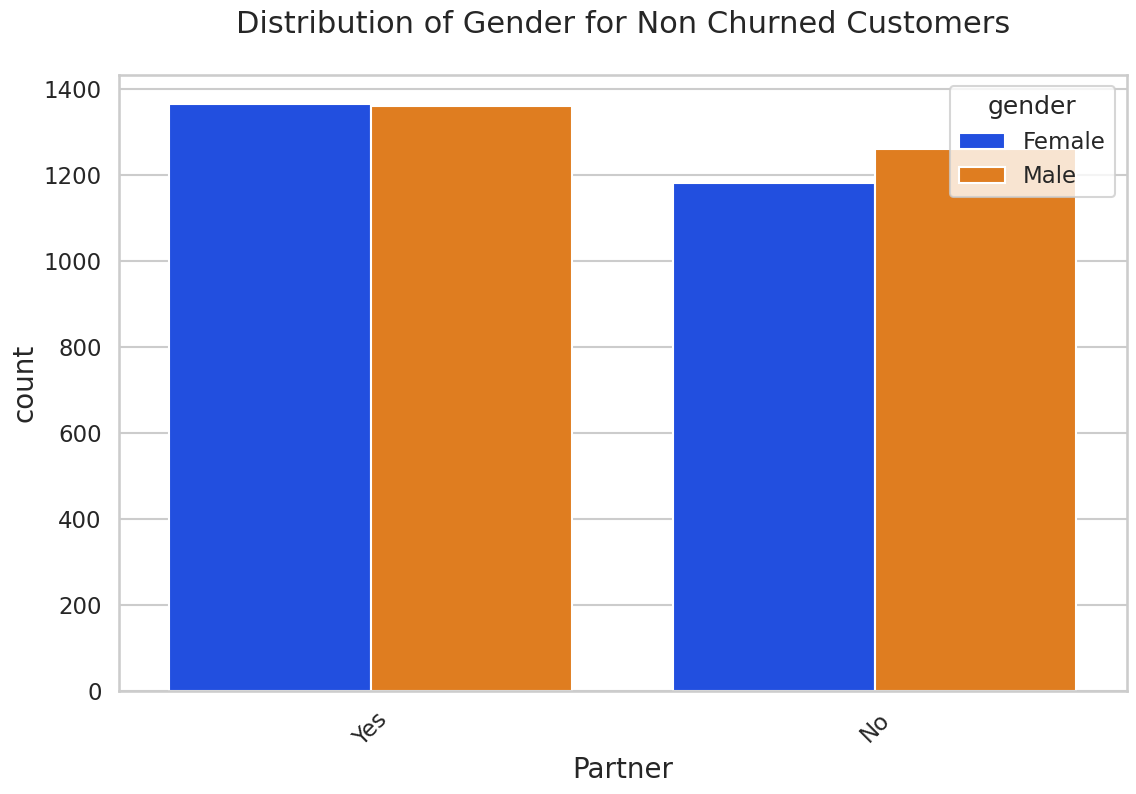

In [146]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

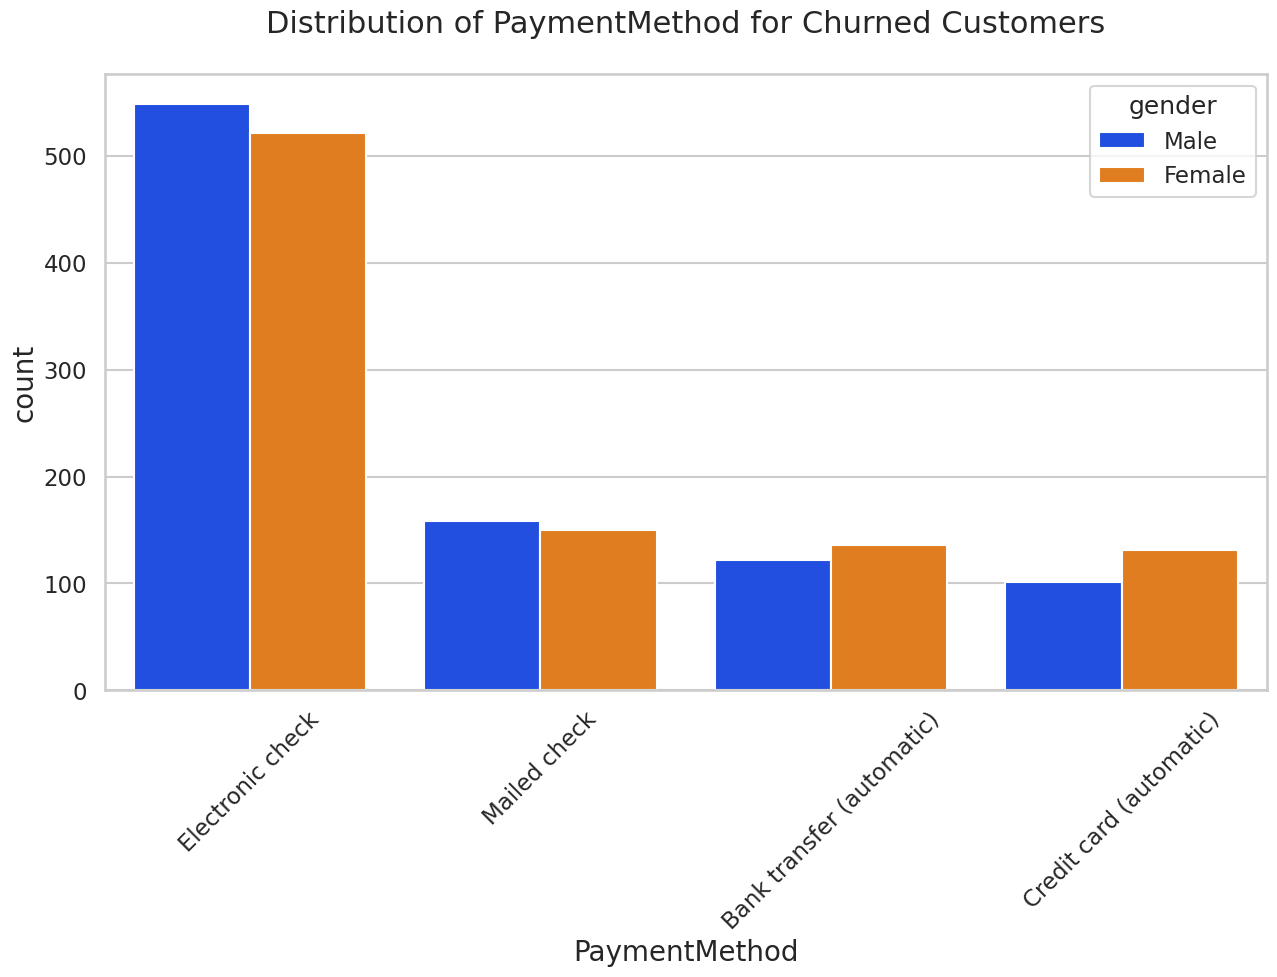

In [144]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

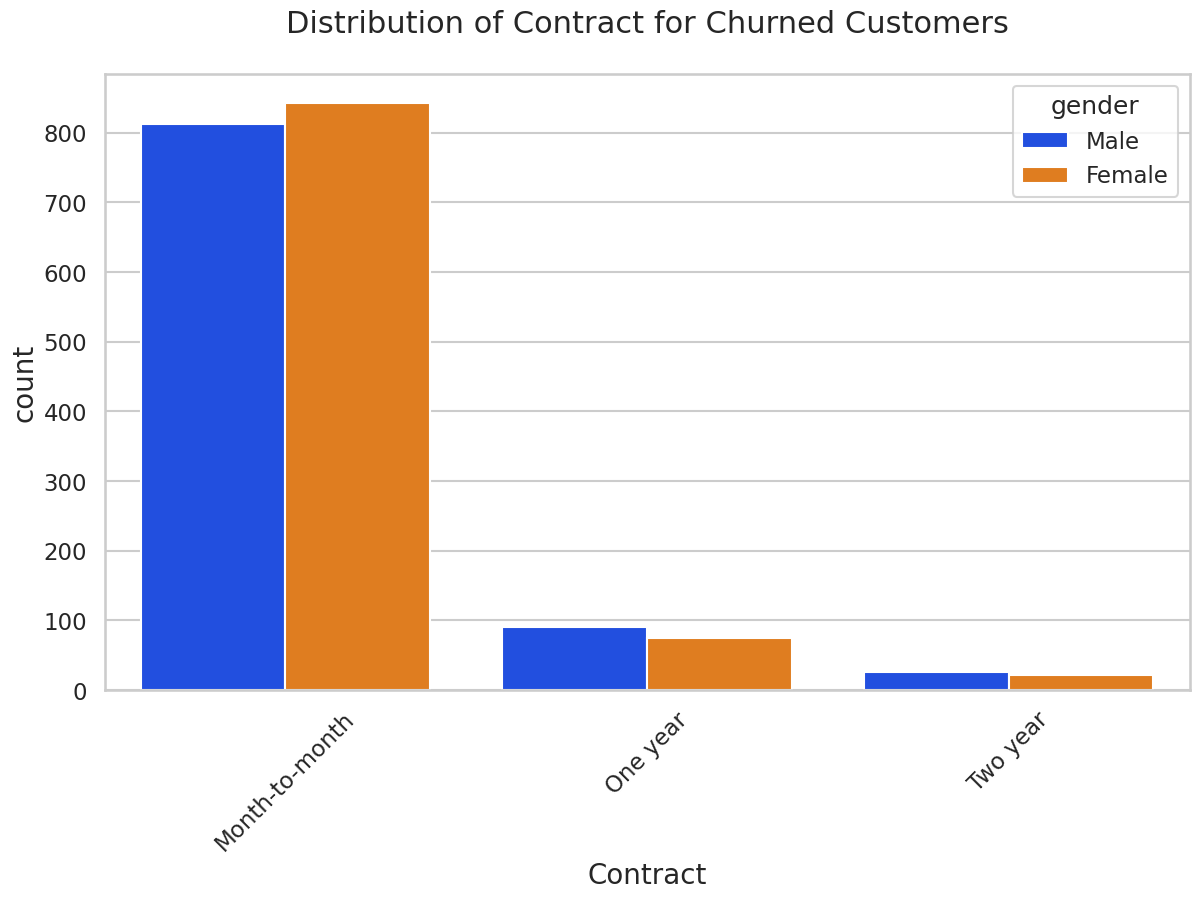

In [218]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

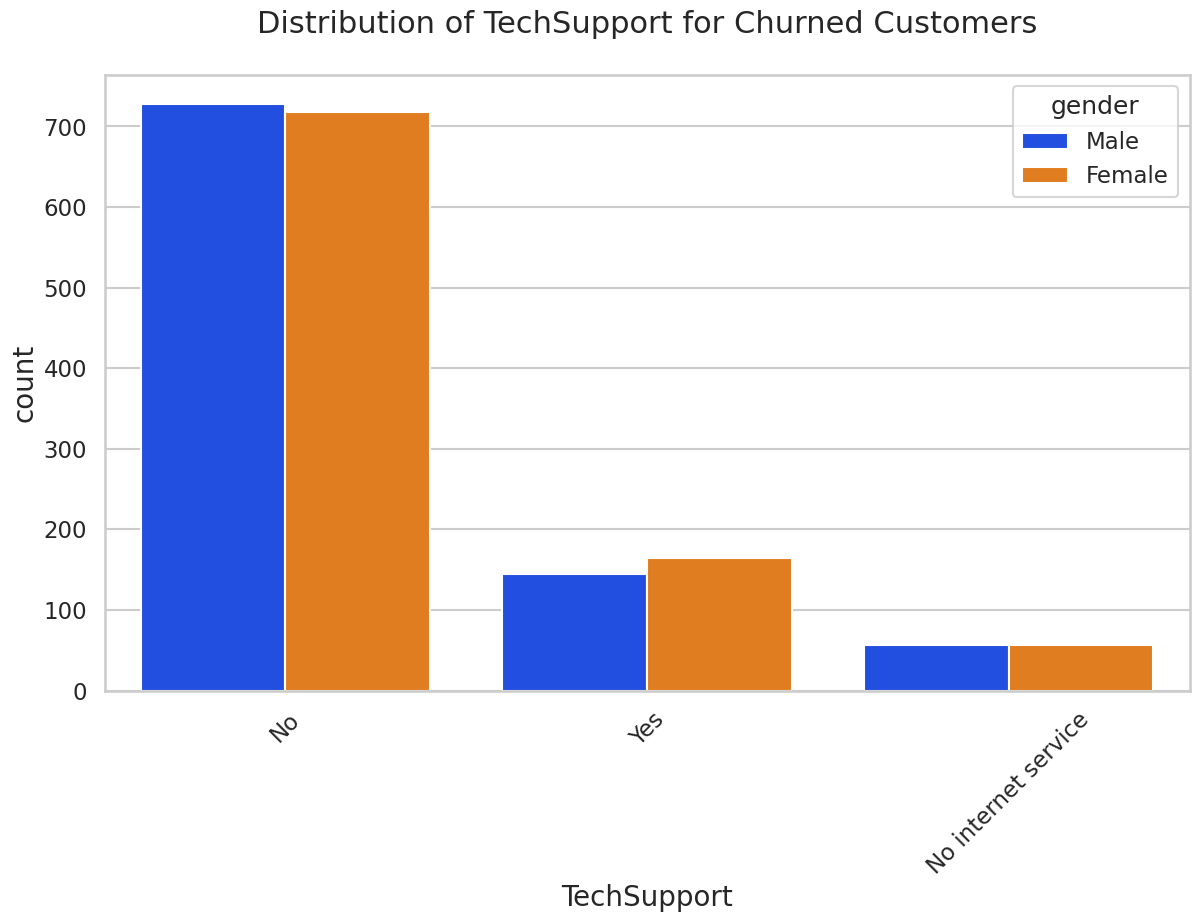

In [220]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

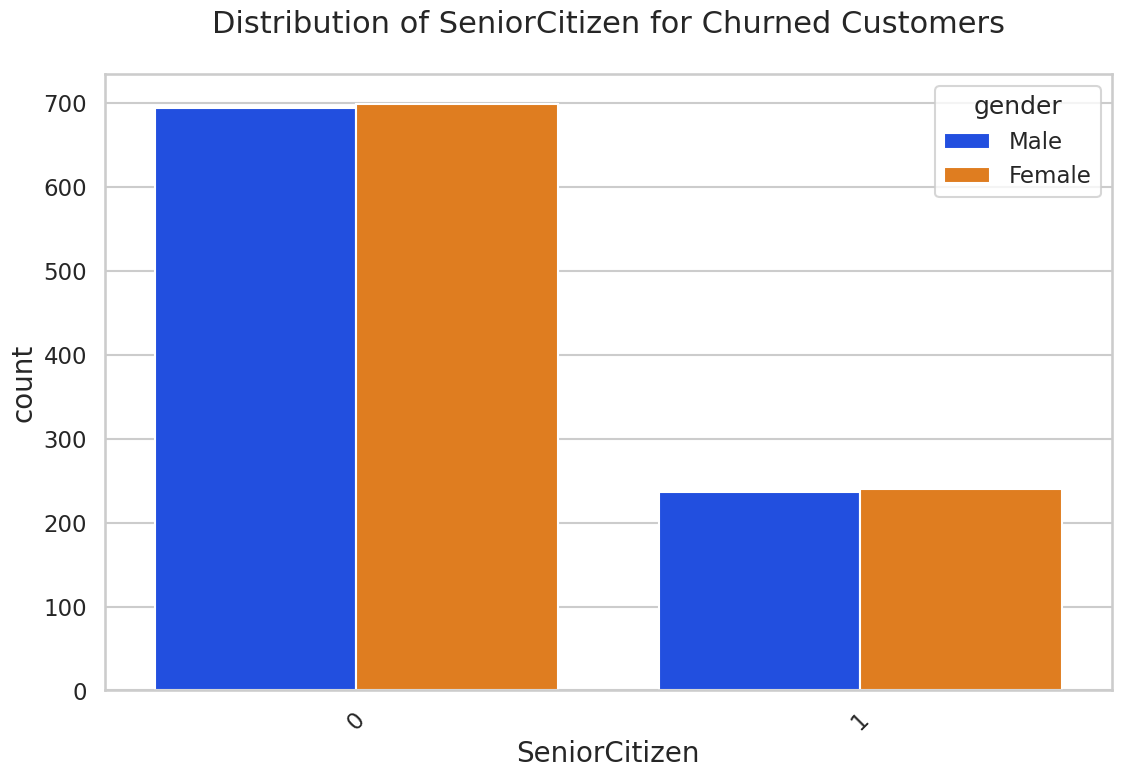

In [219]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

Model Building

In [221]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [222]:
df=telco_data_dummies

In [223]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groups_1-12,tenure_groups_13-24,tenure_groups_25-36,tenure_groups_37-48,tenure_groups_49-60,tenure_groups_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [224]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_groups_1-12,tenure_groups_13-24,tenure_groups_25-36,tenure_groups_37-48,tenure_groups_49-60,tenure_groups_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [225]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Decision Tree Classifier

In [228]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [229]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [230]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [231]:
model_dt.score(x_test,y_test)

0.7882018479033405

In [233]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1026
           1       0.65      0.46      0.54       381

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



UpSampling + ENN

In [239]:
from imblearn.combine import SMOTEENN

In [242]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [243]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [244]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [245]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9356521739130435
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       525
           1       0.93      0.95      0.94       625

    accuracy                           0.94      1150
   macro avg       0.94      0.93      0.94      1150
weighted avg       0.94      0.94      0.94      1150



In [246]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[483  42]
 [ 32 593]]


Random Forest Classifier

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [249]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [250]:
y_pred=model_rf.predict(x_test)

In [251]:
model_rf.score(x_test,y_test)

0.7995735607675906

In [252]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1026
           1       0.69      0.47      0.56       381

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [253]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [254]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [256]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [257]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [261]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [259]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [262]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.948892674616695
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       541
           1       0.94      0.97      0.95       633

    accuracy                           0.95      1174
   macro avg       0.95      0.95      0.95      1174
weighted avg       0.95      0.95      0.95      1174



In [263]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[503  38]
 [ 22 611]]


Pickling the model

In [266]:
import pickle

In [267]:
filename = 'model.sav'

In [268]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [269]:
load_model = pickle.load(open(filename, 'rb'))

In [272]:
load_model.feature_names_in_

array(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Pap

In [273]:
input_data = {
    'SeniorCitizen':0,
     'MonthlyCharges':29.85,
     'TotalCharges':29.85,
     'gender_Female':1,
       'gender_Male':0,
      'Partner_No':0,
      'Partner_Yes':1,
      'Dependents_No':1,
       'Dependents_Yes':0,
      'PhoneService_No':1,
      'PhoneService_Yes':0,
       'MultipleLines_No':0,
     'MultipleLines_No phone service':0,
       'MultipleLines_Yes':0,
      'InternetService_DSL':1,
       'InternetService_Fiber optic':0,
      'InternetService_No':0,
       'OnlineSecurity_No':1,
     'OnlineSecurity_No internet service':0,
       'OnlineSecurity_Yes':0,
     'OnlineBackup_No':0,
       'OnlineBackup_No internet service':0,
     'OnlineBackup_Yes':1,
       'DeviceProtection_No':1,
     'DeviceProtection_No internet service':0,
       'DeviceProtection_Yes':0,
      'TechSupport_No':1,
       'TechSupport_No internet service':0,
     'TechSupport_Yes':0,
       'StreamingTV_No':1,
      'StreamingTV_No internet service':0,
       'StreamingTV_Yes':0,
      'StreamingMovies_No':1,
       'StreamingMovies_No internet service':0,
      'StreamingMovies_Yes':0,
       'Contract_Month-to-month':1,
     'Contract_One year':0,
       'Contract_Two year':0,
     'PaperlessBilling_No':0,
     'PaperlessBilling_Yes':1,
       'PaymentMethod_Bank transfer (automatic)':0,
       'PaymentMethod_Credit card (automatic)':0,
       'PaymentMethod_Electronic check':1,
        'PaymentMethod_Mailed check':0,
       'tenure_groups_1-12':1,
     'tenure_groups_13-24':0,
     'tenure_groups_25-36':0,
       'tenure_groups_37-48':0,
       'tenure_groups_49-60':0,
       'tenure_groups_61-72':0
}


input_data_df = pd.DataFrame([input_data])
# make a prediction
prediction = load_model.predict(input_data_df)
pred_prob = load_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[1]
Prediction: Churn
Prediciton Probability: [[0.11093977 0.88906023]]
